In [33]:
import pandas as pd
import numpy as np

In [11]:
# Extract Data
df = pd.read_csv("Downloads/sample_housing_dataset.csv")

In [18]:
print(df.head (2))
# Check if data is loaded correctly, columns are there.

   Id  LotArea  YearBuilt  YearSold  GarageCars  GarageArea  TotalBsmtSF  \
0   1     9270       1981      2014           0       770.0        529.0   
1   2     2860       1991      2009           1       909.0        319.0   

   GrLivArea  FullBath  HalfBath  BedroomAbvGr KitchenQual Neighborhood  \
0       2147         2         0             3          Fa      NoRidge   
1       2090         2         1             2          TA      CollgCr   

   SalePrice  
0      57032  
1     229166  


In [15]:
# Initial Data Inspection
#  Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1000 non-null   int64  
 1   LotArea       1000 non-null   int64  
 2   YearBuilt     1000 non-null   int64  
 3   YearSold      1000 non-null   int64  
 4   GarageCars    1000 non-null   int64  
 5   GarageArea    900 non-null    float64
 6   TotalBsmtSF   900 non-null    float64
 7   GrLivArea     1000 non-null   int64  
 8   FullBath      1000 non-null   int64  
 9   HalfBath      1000 non-null   int64  
 10  BedroomAbvGr  1000 non-null   int64  
 11  KitchenQual   1000 non-null   object 
 12  Neighborhood  1000 non-null   object 
 13  SalePrice     1000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 109.5+ KB
None


In [16]:
# Quick summary statistics
print(df.describe())

                Id       LotArea    YearBuilt     YearSold   GarageCars  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000   8564.667000  1960.883000  2013.967000     1.524000   
std     288.819436   3652.710083    36.378025     4.883212     1.130797   
min       1.000000   2004.000000  1900.000000  2006.000000     0.000000   
25%     250.750000   5501.000000  1929.000000  2010.000000     0.000000   
50%     500.500000   8615.000000  1960.000000  2014.000000     2.000000   
75%     750.250000  11719.500000  1993.000000  2018.000000     3.000000   
max    1000.000000  14991.000000  2022.000000  2022.000000     3.000000   

       GarageArea  TotalBsmtSF    GrLivArea     FullBath     HalfBath  \
count  900.000000   900.000000  1000.000000  1000.000000  1000.000000   
mean   501.203333  1142.207778  1740.293000     1.455000     0.995000   
std    287.304038   477.163360   709.307604     1.106888     0.802258   
min      0.000000   302.000000  

In [22]:
# Check missing values
print(df.isnull().sum())

# Understand data types, missing values, outliers.


Id                0
LotArea           0
YearBuilt         0
YearSold          0
GarageCars        0
GarageArea      100
TotalBsmtSF     100
GrLivArea         0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
Neighborhood      0
SalePrice         0
dtype: int64


In [24]:
df['KitchenQual'].isna().sum()

0

In [25]:
# Fill numerical columns with median
df['GarageArea'].fillna(df['GarageArea'].median(),inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\1522071061.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageArea'].fillna(df['GarageArea'].median(),inplace = True)


In [26]:
df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\30116518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].median(), inplace = True)


In [27]:
# Fill categorical columns with mode
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11392\1932510581.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)


In [28]:
# Median is robust against outliers (for numbers).

# Mode is most frequent value (for categories).


In [38]:
df['YearBuilt'].dtype

dtype('int64')

In [40]:
# Check for duplicates
print(df.duplicated().sum())

0


In [41]:
# Remove if any duplicates
df = df.drop_duplicates()

In [43]:
# Feature Engineering

# Create a new column: Age of the House
df['HouseAge'] = df['YearSold'] -  df['YearBuilt']

In [44]:
# Create a new column: Total Bathrooms

df['TotalBath'] = df['FullBath'] + 0.5 * df['HalfBath']

In [46]:
# Log transform LotArea to handle skewness

df['LotArea_log'] = np.log1p(df['LotArea'])

# New features can improve model accuracy later.


In [48]:
# Basic information
# Number of rows and columns
df.shape

(1000, 17)


In [49]:
# Column names
df.columns.tolist()

['Id',
 'LotArea',
 'YearBuilt',
 'YearSold',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Neighborhood',
 'SalePrice',
 'HouseAge',
 'TotalBath',
 'LotArea_log']

In [52]:
# Missing value count
print(df.isnull().sum())

# Identify columns that need cleaning or imputation.

Id              0
LotArea         0
YearBuilt       0
YearSold        0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
Neighborhood    0
SalePrice       0
HouseAge        0
TotalBath       0
LotArea_log     0
dtype: int64


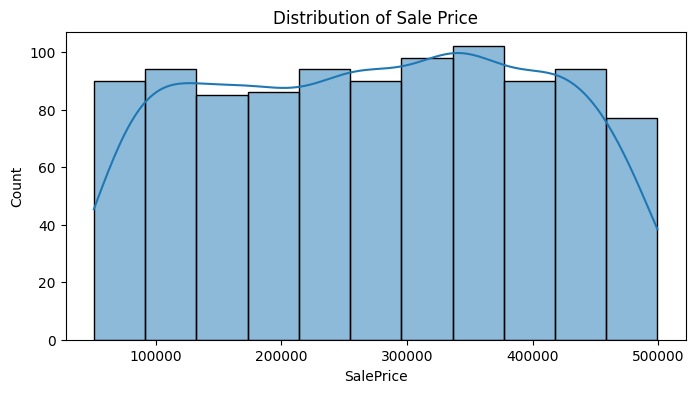

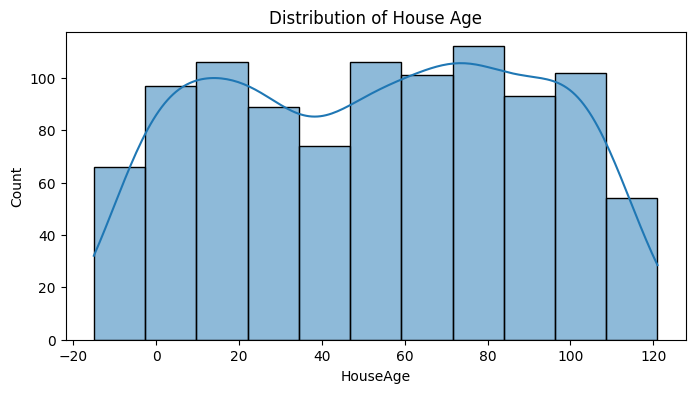

In [55]:
#  Univariate Analysis (One Variable at a time)

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for SalePrice
plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

# Histogram for HouseAge
plt.figure(figsize=(8, 4))
sns.histplot(df['HouseAge'], kde=True)
plt.title("Distribution of House Age")
plt.show()


# To check skewness, normality, outliers.

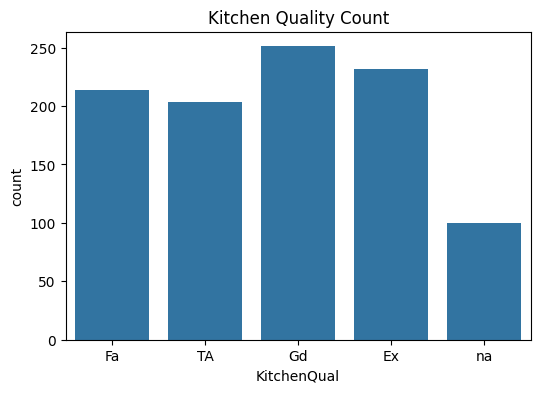

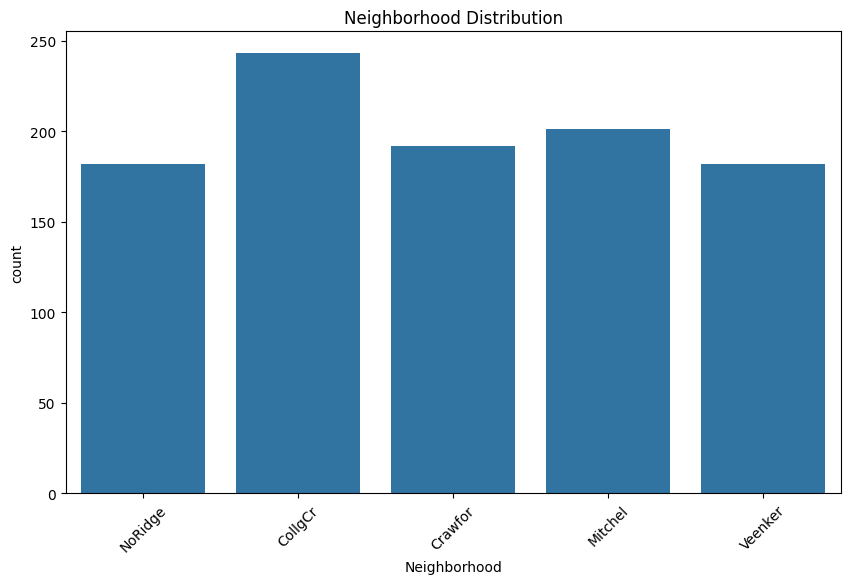

In [57]:
# Categorical Variables — Count Plots

# Count plot for Kitchen Quality
plt.figure(figsize=(6, 4))
sns.countplot(x='KitchenQual', data=df)
plt.title("Kitchen Quality Count")
plt.show()

# Count plot for Neighborhoods
plt.figure(figsize=(10, 6))
sns.countplot(x='Neighborhood', data=df)
plt.xticks(rotation=45)
plt.title("Neighborhood Distribution")
plt.show()

# To see how categories are distributed.

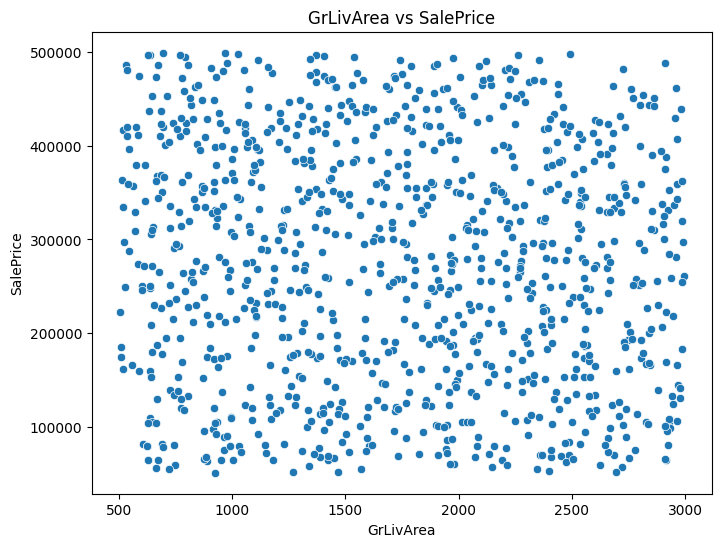

In [59]:
# Bivariate Analysis (Two Variables)

# GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Check if bigger houses sell for more (relationship between features).


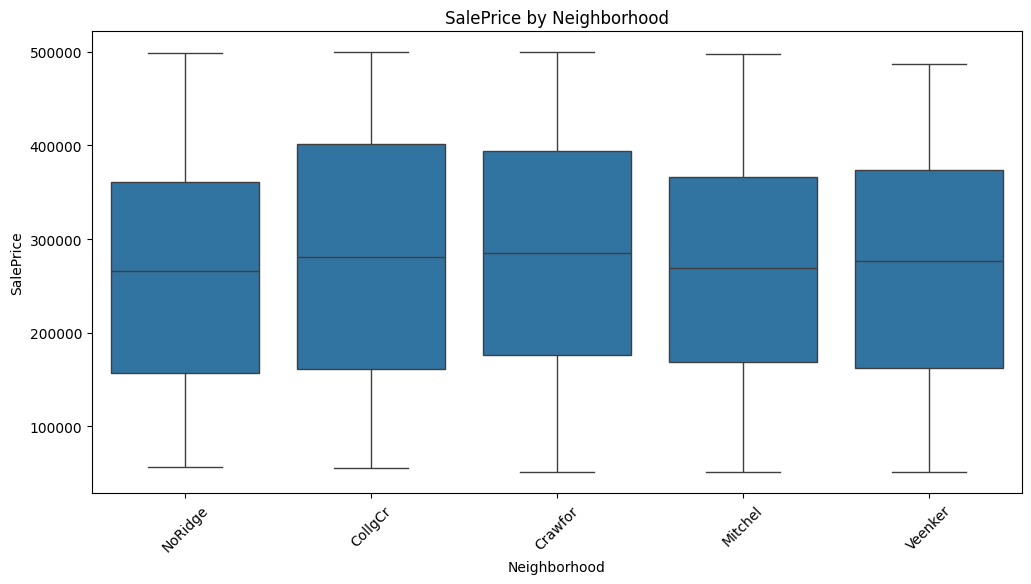

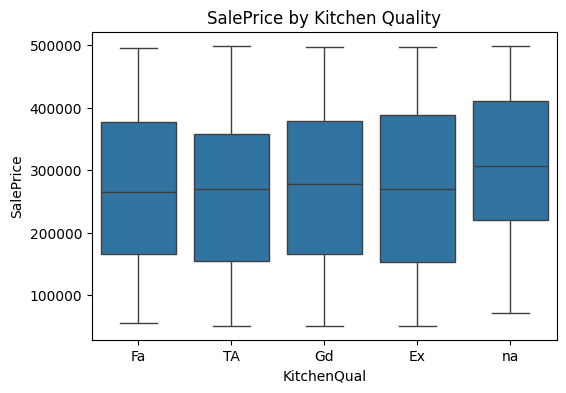

In [61]:
# Categorical vs Numeric — Boxplots

# Neighborhood vs SalePrice
plt.figure(figsize=(12, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("SalePrice by Neighborhood")
plt.show()

# KitchenQual vs SalePrice
plt.figure(figsize=(6, 4))
sns.boxplot(x='KitchenQual', y='SalePrice', data=df)
plt.title("SalePrice by Kitchen Quality")
plt.show()

# See how SalePrice varies across different categories.


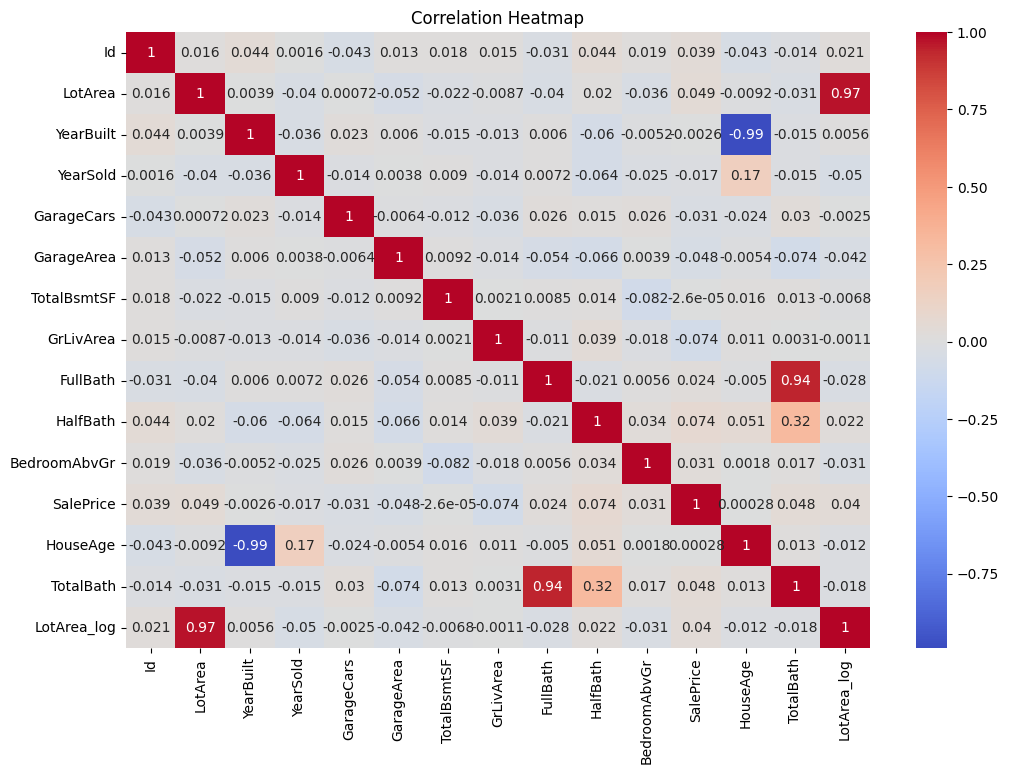

Top features correlated with SalePrice:
 SalePrice       1.000000
HalfBath        0.073544
LotArea         0.049063
TotalBath       0.047537
LotArea_log     0.040230
Id              0.038554
BedroomAbvGr    0.030544
FullBath        0.023567
HouseAge        0.000279
TotalBsmtSF    -0.000026
YearBuilt      -0.002559
YearSold       -0.016954
GarageCars     -0.031306
GarageArea     -0.048287
GrLivArea      -0.074414
Name: SalePrice, dtype: float64


In [63]:
# Correlation Analysis

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Focused Correlation with SalePrice
corr_target = corr['SalePrice'].sort_values(ascending=False)
print("Top features correlated with SalePrice:\n", corr_target)

# Find which features strongly influence the target (SalePrice).


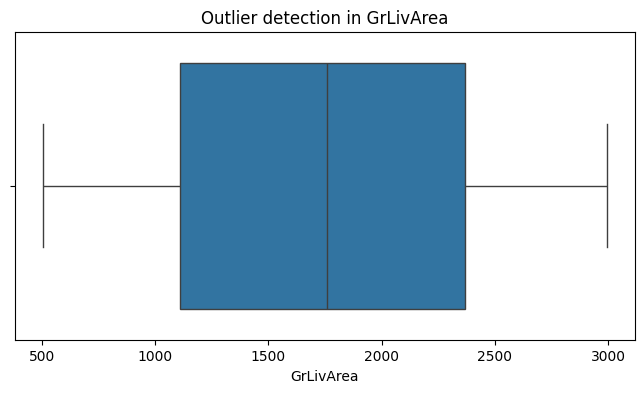

In [65]:
# Outlier Detection

# Boxplot to detect outliers in GrLivArea
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['GrLivArea'])
plt.title("Outlier detection in GrLivArea")
plt.show()

# Outliers can harm model performance.


✅ 1. Handling Missing Values
👉 Problem:
Missing values can lead to errors or wrong results.

👉 Solution:
For numerical columns → Fill with mean, median, or model prediction.

For categorical columns → Fill with mode (most frequent) or new category ("Unknown").

✅ Why median?
It is safe against outliers!

✅ Why mode for categories?
It keeps the most frequent value.

✅ 2. Fixing Skewness
👉 Problem:
Highly skewed features make models confused.
Models expect features to be normally distributed (like bell curve).

Example: LotArea is usually right-skewed.

👉 Solution:
Apply log transformation (np.log1p) for skewed features.

✅ Why np.log1p(x) and not np.log(x)?
log1p(x) safely handles 0 values too (log(0) is undefined).

✅ 3. Handling Strong Correlations (Multicollinearity)
👉 Problem:
When two features are highly correlated (say > 0.9), it causes multicollinearity and confuses models (like Linear Regression).

Example:
If TotalBsmtSF and GrLivArea are 95% correlated → One is enough.

👉 Solution:
Detect highly correlated pairs

Drop one of the highly correlated features

✅ Why drop?
Keep only one of the two highly correlated features to avoid information duplication.


Skewness before log transform:
-0.005455342426970489


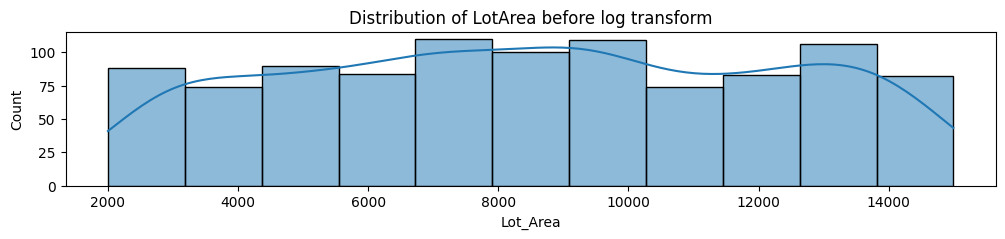

In [84]:
# Check skewness before
print("Skewness before log transform:")
print(df['Lot_Area'].skew())


plt.figure(figsize=(12, 2))
sns.histplot(df['Lot_Area'], kde=True)
plt.title("Distribution of LotArea before log transform")
plt.show()

Skewness before log transform:
-0.005455342426970489
Skewness after log transform:
-0.7259258074429941


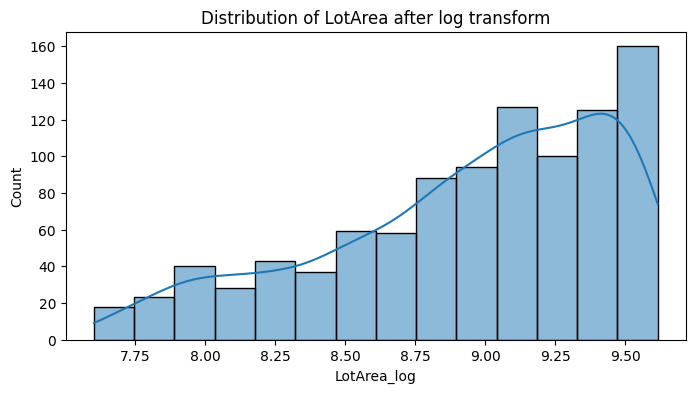

In [66]:
# Check skewness before
print("Skewness before log transform:")
print(df['LotArea'].skew())

# Apply log transformation
df['LotArea_log'] = np.log1p(df['LotArea'])

# Check skewness after
print("Skewness after log transform:")
print(df['LotArea_log'].skew())


plt.figure(figsize=(8, 4))
sns.histplot(df['LotArea_log'], kde=True)
plt.title("Distribution of LotArea after log transform")
plt.show()


In [68]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

print("Highly correlated features to drop:", to_drop)

# Drop those features
df.drop(columns=to_drop, inplace=True)

# Keep only one of the two highly correlated features to avoid information duplication.


Highly correlated features to drop: []


In [70]:
# Strip spaces and convert to upper case
df['KitchenQual'] = df['KitchenQual'].str.strip().str.upper()

In [73]:
# Check unique categories after cleaning
df['KitchenQual'].unique()
# Consistent categories are needed for analysis.

array(['FA', 'TA', 'GD', 'EX', 'NA'], dtype=object)

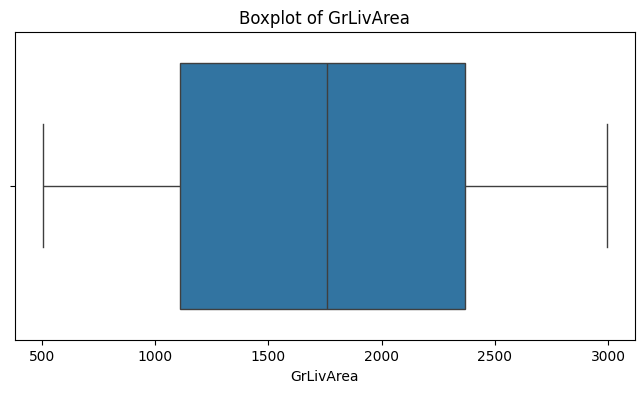

In [74]:
# Visualize
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['GrLivArea'])
plt.title('Boxplot of GrLivArea')
plt.show()


In [75]:
# Remove extreme outliers (optional step)
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1


In [76]:
# Keep only non-outlier data
df = df[(df['GrLivArea'] >= (Q1 - 1.5 * IQR)) & (df['GrLivArea'] <= (Q3 + 1.5 * IQR))]

In [79]:
# Rename columns to clean names
df.rename (columns = {'SalePrice' : 'Sale_Price', 'LotArea' : 'Lot_Area'}, inplace = True)
# Good column names = easy understanding later

In [87]:
df['KitchenQual'].value_counts()


KitchenQual
GD    251
EX    232
FA    214
TA    203
NA    100
Name: count, dtype: int64

In [88]:
df['Neighborhood'].unique()

array(['NoRidge', 'CollgCr', 'Crawfor', 'Mitchel', 'Veenker'],
      dtype=object)